In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV

In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\parik\Downloads\Fast Food Sales.csv")

# Assuming 'item_type' is the target column and 'item_price', 'quantity' are feature columns
class1_data = data[data['item_type'] == 'Fastfood']  
class2_data = data[data['item_type'] == 'Beverages'] 

# Calculate class centroids
centroid1 = class1_data[['item_price', 'quantity']].mean(axis=0)
centroid2 = class2_data[['item_price', 'quantity']].mean(axis=0)

# Calculate spread (standard deviation)
spread1 = class1_data[['item_price', 'quantity']].std(axis=0)
spread2 = class2_data[['item_price', 'quantity']].std(axis=0)

# Calculate distance between centroids
interclass_distance = np.linalg.norm(centroid1 - centroid2)

print("Class 1 Centroid:\n", centroid1)
print("Class 2 Centroid:\n", centroid2)
print("Spread of Class 1:\n", spread1)
print("Spread of Class 2:\n", spread2)
print("Interclass Distance:", interclass_distance)


Class 1 Centroid:
 item_price    33.600583
quantity       8.051020
dtype: float64
Class 2 Centroid:
 item_price    32.691083
quantity       8.404459
dtype: float64
Spread of Class 1:
 item_price    17.282815
quantity       4.428708
dtype: float64
Spread of Class 2:
 item_price    7.509533
quantity      4.375956
dtype: float64
Interclass Distance: 0.9757608969995947


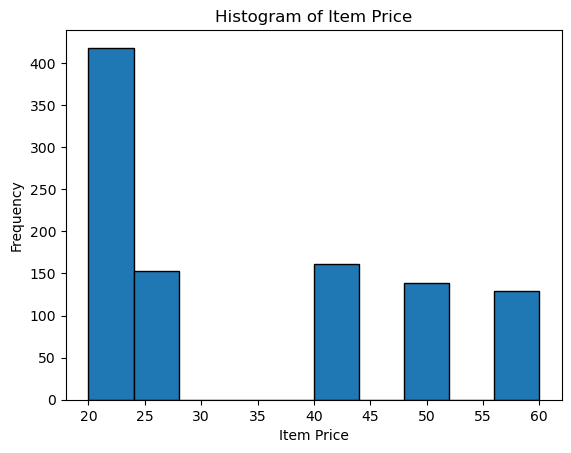

Mean of Item Price: 33.315
Variance of Item Price: 222.65843343343138


In [8]:
import matplotlib.pyplot as plt

feature_data = data['item_price']

# Plot histogram
plt.hist(feature_data, bins=10, edgecolor='black')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.title('Histogram of Item Price')
plt.show()

# Calculate mean and variance
mean = feature_data.mean()
variance = feature_data.var()

print("Mean of Item Price:", mean)
print("Variance of Item Price:", variance)


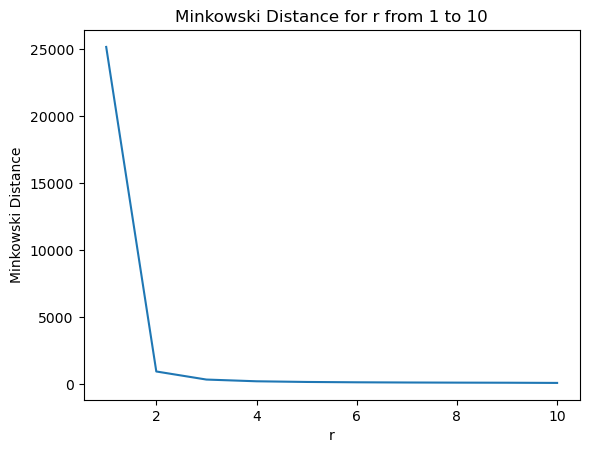

In [9]:
# Assume 'item_price' and 'quantity' are the features we are interested in
feature1 = data['item_price']
feature2 = data['quantity']

minkowski_distances = []

for r in range(1, 11):
    distance = np.sum(np.abs(feature1 - feature2)**r)**(1/r)
    minkowski_distances.append(distance)

plt.plot(range(1, 11), minkowski_distances)
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance for r from 1 to 10')
plt.show()


In [10]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.model_selection import train_test_split

# Assume 'item_type' is the target column and 'item_price', 'quantity' are feature columns
X = data[['item_price', 'quantity']]
y = data['item_type']

# Encode the target labels if they are not numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [13]:
# Test accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


Confusion Matrix:
 [[ 88   0]
 [  0 212]]
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


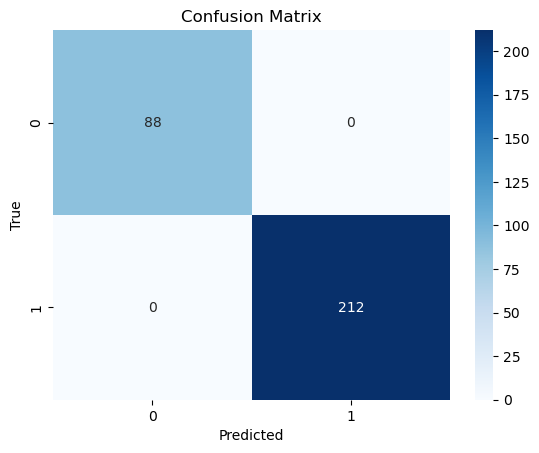

In [14]:
# Predict and evaluate
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Assume 'item_price' is the feature and 'transaction_amount' is the target column for regression
X_train = data[['item_price']]
y_train = data['transaction_amount']

# Train linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)

# Calculate metrics
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2 Score:", r2)


MSE: 24789.844270480997
RMSE: 157.44790970502274
MAPE: 1.1074083656005096
R2 Score: 0.4060719044900075


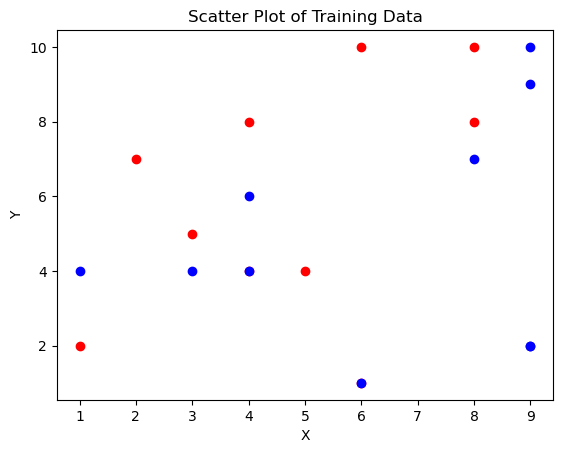

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generating 20 random data points
np.random.seed(0)
X_train = np.random.randint(1, 11, size=(20, 2))
y_train = np.random.choice([0, 1], size=20)

# Scatter plot
for i in range(len(y_train)):
    if y_train[i] == 0:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='blue')
    else:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')
plt.show()


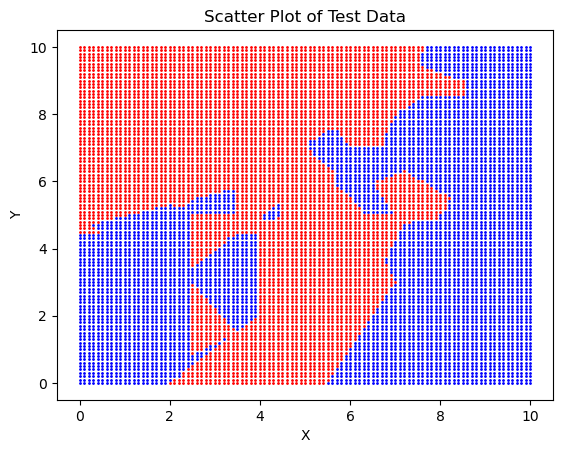

In [17]:
# Generate test set
X_test = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])

# Train kNN classifier (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict test set
y_test_pred = knn.predict(X_test)

# Scatter plot of test data
for i in range(len(y_test_pred)):
    if y_test_pred[i] == 0:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='blue', s=1)
    else:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='red', s=1)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Test Data')
plt.show()


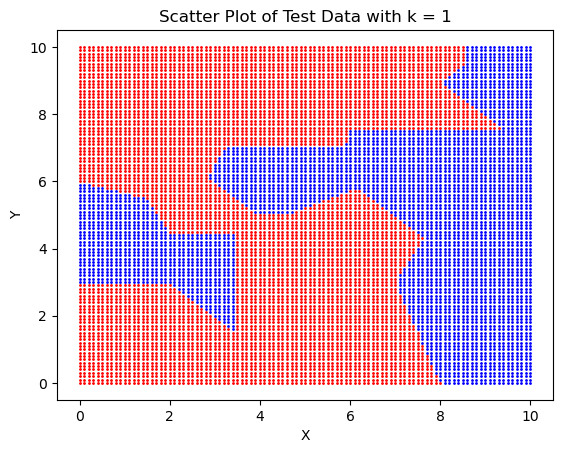

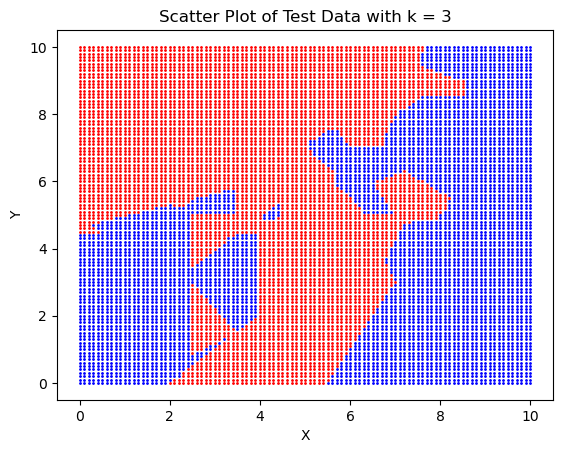

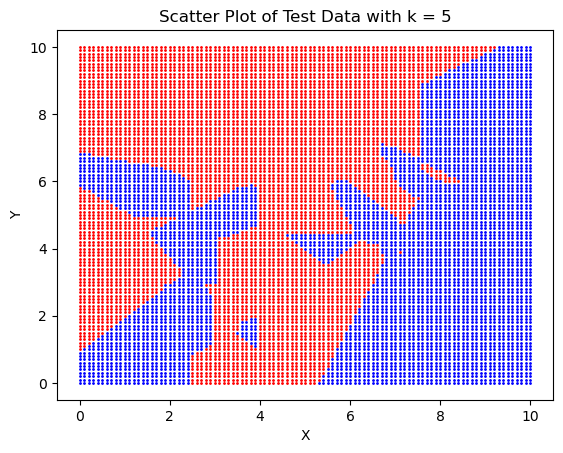

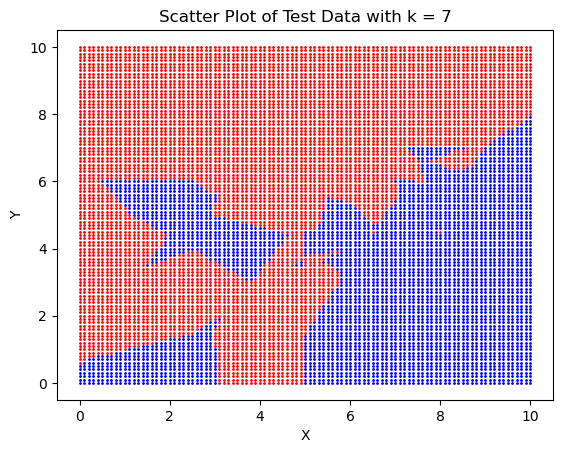

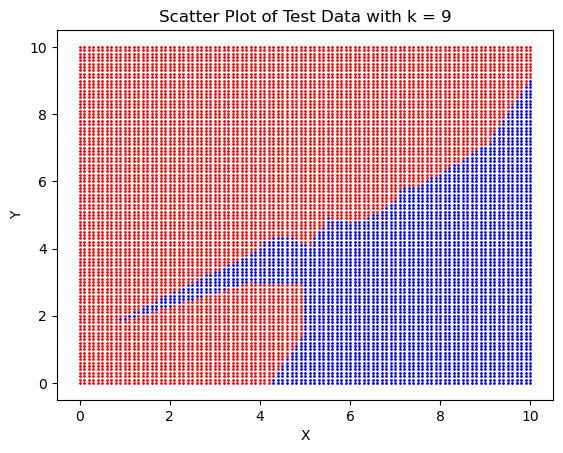

In [18]:
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    
    plt.figure()
    for i in range(len(y_test_pred)):
        if y_test_pred[i] == 0:
            plt.scatter(X_test[i, 0], X_test[i, 1], color='blue', s=1)
        else:
            plt.scatter(X_test[i, 0], X_test[i, 1], color='red', s=1)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Scatter Plot of Test Data with k = {k}')
    plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 31)}

# Initializing the GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)


Best k value: 9


C:\Users\parik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\parik\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\parik\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\parik\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 271, in predict
    neigh_in